In [6]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

In [7]:
def authenticate():
  client_id=r"sh-1938361d-54b2-4748-9a42-ea2fac95b228"
  client_secret=r"PFNrAcejparNDdRhHyFyLvc72yL4ldid"
  client = BackendApplicationClient(client_id=client_id)
  oauth = OAuth2Session(client=client)
  token=oauth.fetch_token(token_url="https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",client_secret=client_secret,include_client_id=True)
  return oauth,token

In [86]:
oauth,token=authenticate()
evalscript = """
//VERSION=3
function setup() {
  return {
    input: [{
        bands: ["VV", "VH","dataMask"],
        units:"LINEAR_POWER"
    }],
    output: { id: "default", bands: 3},
  }
}

function evaluatePixel(samples) {
  var vvdB = toDb(samples.VV)
  var vhdB = toDb(samples.VH)
  return [toDb(samples.VV)]
}

// displays VV in decibels from -20 to 0

function toDb(linear) {
  // the following commented out lines are simplified below
  // var log = 10 * Math.log(linear) / Math.LN10
  // var val = Math.max(0, (log + 20) / 20)
  return Math.max(0, Math.log(linear) * 0.21714724095 + 1)
}
"""

request = {
    "input": {
        "bounds": {
            "bbox": [
                 1360000,
                5121900,
                1370000,
                5131900,
            ],
            "properties": {"crs": "http://www.opengis.net/def/crs/EPSG/0/3857"},
        },
        "data": [
            {
                "type": "sentinel-1-grd",
                "dataFilter": {
                    "timeRange": {
                        "from": "2019-02-02T00:00:00Z",
                        "to": "2024-04-02T23:59:59Z",
                    }
                },
                "processing": {"orthorectify": "true",
                    "backCoeff": "GAMMA0_TERRAIN",
                    "demInstance": "COPERNICUS_30",
                    "speckleFilter": {
                        "type": "LEE",
                        "windowSizeX": 5,
                        "windowSizeY": 5,
                    },
                },
            }
        ],
    },
    "output": {
        "width": 512,
        "height": 512,
        "responses": [
            {
                "identifier": "default",
                "format": {"type": "image/png"},
            }
        ],
    },
    "evalscript": evalscript,
}
url = "https://sh.dataspace.copernicus.eu/api/v1/process"
response = oauth.post(url, json=request)
print(response.content)

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x02\x00\x00\x00{\x1aC\xad\x00\x00\x80\x00IDATx^\x94\xbdw\x94T\xd7\xb5\xee\xbb\xdf\xb8o\x8cw\xc6\xb8\xbe\xc7\xf6\xb1u,Y\xb2"H"gh\xba\xa1\x81\xa6s\x8e\xd5\xb1\xaa\xbb\xaacUW\xe7\x1c\xe9\xa6\x134\r4t\x93s\x8e"\x07\x81\x00\x01B !$\x94P\xb0\xacd[\xc9A\x96,\xd9\x96m\x1d\xf1\x9a\xdf\xf2\xc7-\x8e\xee\x1f\xef1\xd6\xa8\xb1k\xef\xb5\xe7\x9ak\xceo~s\xae\xb5w5\xd6o,\xeb\x9ae}fY_[\xd6?,\xeb\x8f\x96\xf5\xa5e\xdd\xfc\xff\xd6\x86\xee\xbahY\x9b,k\xade\xed\xb1\xac#\x96u\xf9\xce\x0e\xdfZ\xd6\x8b\x96\xf5\x9ce\xfd\xd6\xb2\xde\xa3]\xe5\xccK\x1c\xbcoY\xbf\xb7\xac\x7f2\xf4\xeb\x96\xb5\xc1\xb2\x16YV#\x07\xad\x96UdY\x19\x96\x95bY1|\xce\xb1\xac`\xce\xb8\xf8\x9adY\xf1\x96\x95\xc6g\xb4e\x15ZV\x81eUX\x96\xc7\xb2\xea,\xab\x813\x91\xdc\xf5\xa8e\xddeY\xf7[\xd6x\xcb\n\xb1\xact\xcb\xca\xa1\xf3\x90\xa8L\xe4\xc4Z\xd6h\xcbz\xdc\xb2fpK\x1e}28\x9eiY#,\xeba\xcb\x9ahY\x8fY\xd6\x04\xcb\x8a\xe0j\xbee\xd9-\xab\x94f\x06\xad\xa2\r\x89M\xb0\xac8$g\xd0g\xa8\x7f\

In [87]:
from PIL import Image
import io
image=Image.open(io.BytesIO(response.content))

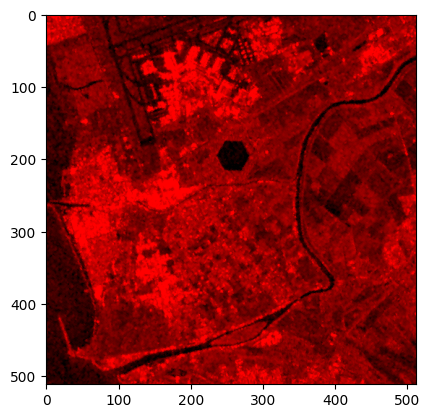

In [88]:
import matplotlib.pyplot as plt
plt.imshow(image, vmin=0, vmax=255)

In [18]:
with open("testy.tiff","wb") as f:
    f.write(response.content)

In [252]:
import esa_snappy as snappy

In [13]:
import io
from esa_snappy import ProductIO 

stk=ProductIO.readProduct("testy.tiff")
bands=list(stk.getBandNames())
bands

Error while parsing JAI registry file "file:/opt/esa-snap/snap/modules/ext/org.esa.snap.snap-core/org-geotools/gt-coverage.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #31
A descriptor is already registered against the name "org.geotools.ColorReduction" under registry mode "rendered"
Error in registry file at line number #32
A descriptor is already registered against the name "org.geotools.ColorInversion" under registry mode "rendered"
Error while parsing JAI registry file "file:/opt/esa-snap/snap/modules/ext/org.esa.snap.snap-core/org-jaitools/jt-zonalstats.jar!/META-INF/registryFile.jai" :
Error in registry file at line number #4
A descriptor is already registered against the name "ZonalStats" under registry mode "rendered"
SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.
SLF4J: Class path contains SLF4J bindings targeting slf4j-ap

['band_1', 'band_2', 'band_3', 'band_4']

In [14]:
import numpy as np
bands_data = []
for i in bands:
    band = stk.getBand(i)
    w = band.getRasterWidth()
    h = band.getRasterHeight()
    band_data = np.zeros(w * h, np.float32)
    band.readPixels(0, 0,w, h, band_data)
    band_data.resize((w,h))
    bands_data.append(band_data)
bands_data

Warning 1: testy.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: testy.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: testy.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: testy.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


[array([[1.19874  , 1.2324873, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [1.1476372, 1.1662251, 0.       , ..., 0.       , 0.       ,
         0.       ],
        [1.3330958, 1.2392029, 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.

In [20]:
import numpy as np
import rasterio
img_data=list()
ras=rasterio.open("testy.tiff")
for i in range(ras.count):
    img_data.append(ras.read(i+1,out_dtype=np.float32))
img_data

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., .

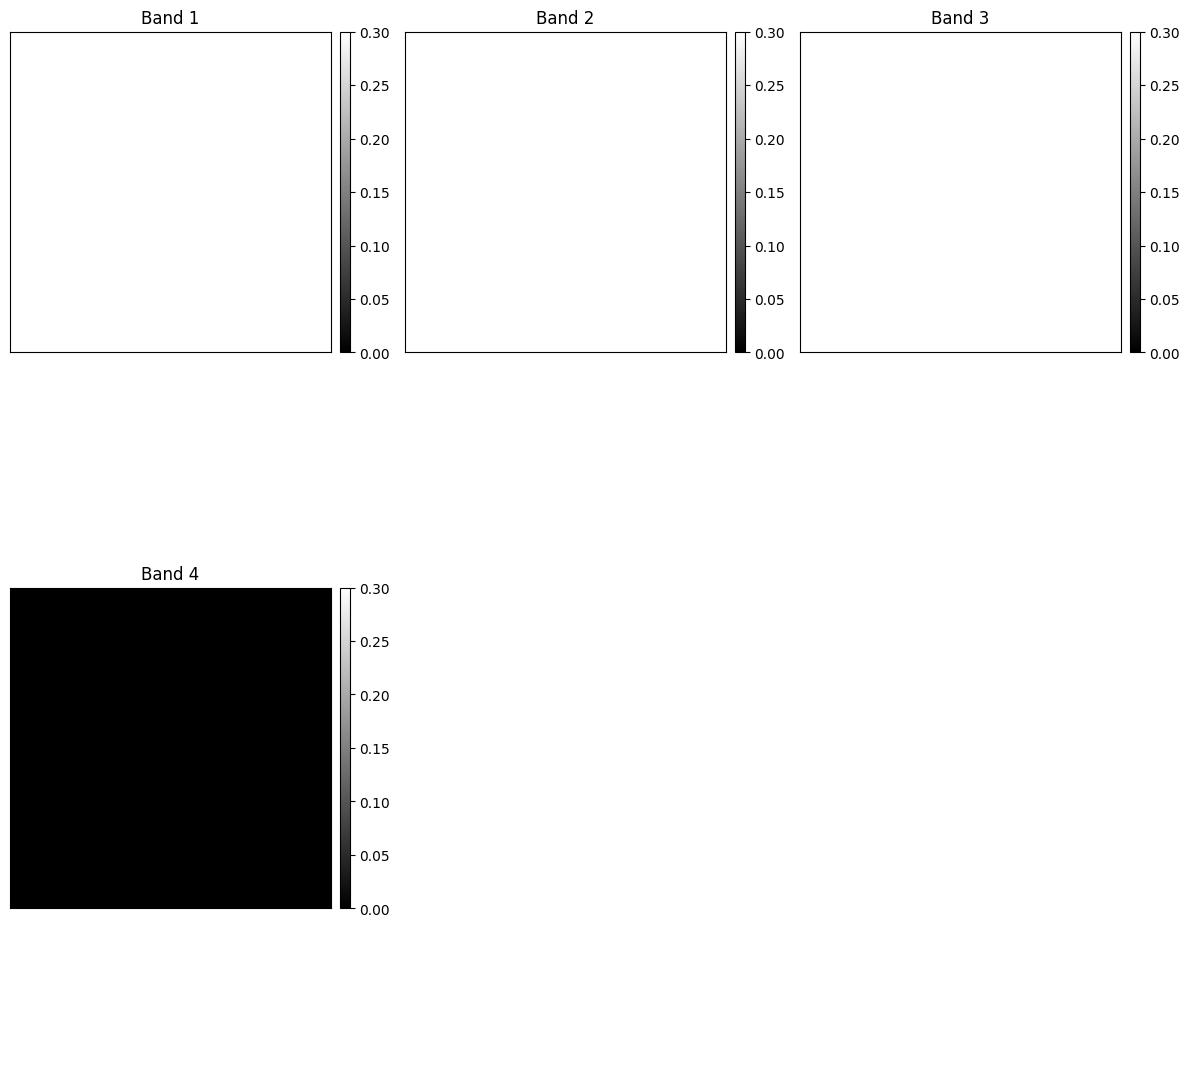

In [21]:
import matplotlib.pyplot as plt
import earthpy.plot as ep
ep.plot_bands(arr=np.array(img_data),cmap="grey",vmax=0.3)
plt.show()  
# plt.imshow(img_data[0],cmap="gray")
# plt.show()

In [281]:
plt.close()

In [ ]:
#https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-1/soil_moisture_estimation/supplementary_material.pdf



In [2]:
import ee
ee.Authenticate()


True

In [3]:
ee.Initialize(project='ee-dhruvassaravana')
print(ee.String('Hello from the Earth Engine servers!').getInfo())

Hello from the Earth Engine servers!


In [4]:
import geemap
Map=geemap.Map(center=(13.27754,77.127669),zoom=11.5)
Map


Map(center=[13.27754, 77.127669], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Searc…

In [7]:
geojsonObject = {
  "type": "Polygon",
  "coordinates": [
    [
      [77.0276690712592, 13.377540411433277],
      [77.0276690712592, 13.177540411433277],
      [77.22766907125919, 13.177540411433277],
      [77.22766907125919, 13.377540411433277]
    ]
  ]
};
geometry=ee.Geometry(geojsonObject)
print('ee.Geometry accepts a GeoJSON object', ee.Geometry(geojsonObject));

ee.Geometry accepts a GeoJSON object ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              77.0276690712592,
              13.377540411433277
            ],
            [
              77.0276690712592,
              13.177540411433277
            ],
            [
              77.22766907125919,
              13.177540411433277
            ],
            [
              77.22766907125919,
              13.377540411433277
            ]
          ]
        ]
      }
    }
  }
})


In [8]:
dataset = ee.ImageCollection('NASA/SMAP/SPL3SMP_E/006').filter(ee.Filter.date('2024-01-01', '2024-01-31')).filterBounds(geometry)

soilMositureSurface = dataset.select('soil_moisture_am')

merged_image = soilMositureSurface.mean().clip(geometry)

min = merged_image.reduceRegion(reducer=ee.Reducer.min(), geometry=geometry, scale=400)
max = merged_image.reduceRegion(reducer=ee.Reducer.max(), geometry=geometry, scale=400)

print("Maximum Soil Moisture Value:", max.get('soil_moisture_am').getInfo())

vis={
    "min":0,
    "max":0.5,
    "palette":  ['0300ff', '418504', 'efff07', 'efff07', 'ff0303']
}

Map.add_layer(merged_image, {"min":min.get('soil_moisture_am').getInfo(),"max":max.get('soil_moisture_am').getInfo(),'palette': ['0300ff', '418504', 'efff07', 'efff07', 'ff0303']}, 'Soil Mositure',True,1)
Map.add_layer(soilMositureSurface.mean(),vis,"test")

Map

Maximum Soil Moisture Value: 0.15249088406562805


Map(bottom=485563.0, center=[13.27754, 77.127669], controls=(WidgetControl(options=['position', 'transparent_b…

In [10]:
# features = geemap.fishnet(geometry, rows=2, cols=2)
# geemap.download_ee_image_tiles(soilMositureSurface.median(), features, "./", prefix="landsat_", crs="EPSG:3857", scale=30)


# geemap.ee_export_image(merged_image, filename="./test.tif", scale=90, region=geometry, file_per_band=False)
Map.layer_to_image("Soil Mositure",output="dem.png",scale=20,region=geometry)
    
geemap.show_image("dem.jpg")

dem.png.tif: |          | 0.00/3.82M (raw) [  0.0%] in 00:00 (eta:     ?)

Output()

In [51]:
import rasterio 
f=rasterio.open("test.tif")
f.read()

array([[[0.14415814, 0.14415814, 0.14415814, ..., 0.12671879,
         0.12671879, 0.12671879],
        [0.14415814, 0.14415814, 0.14415814, ..., 0.12671879,
         0.12671879, 0.12671879],
        [0.14415814, 0.14415814, 0.14415814, ..., 0.12671879,
         0.12671879, 0.12671879],
        ...,
        [0.14330545, 0.14330545, 0.14330545, ..., 0.13129596,
         0.13129596, 0.13129596],
        [0.14330545, 0.14330545, 0.14330545, ..., 0.13129596,
         0.13129596, 0.13129596],
        [0.14330545, 0.14330545, 0.14330545, ..., 0.13129596,
         0.13129596, 0.13129596]]], dtype=float32)

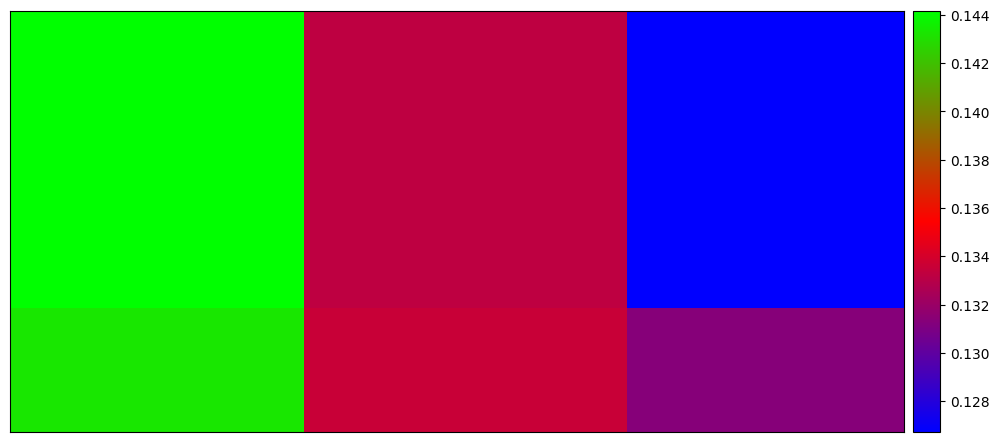

In [54]:
import matplotlib.pyplot as plt
import earthpy.plot as ep
ep.plot_bands(arr=f.read(),cmap="brg",vmax=0.14415813982486725)
plt.show()  